In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# Step 1: Load the Dataset
file_path = 'car.csv'
car_data = pd.read_csv(file_path)

In [3]:
# Step 2: Explore the Dataset
print("Dataset Info:")
print(car_data.info())
print("\nFirst Few Rows:")
print(car_data.head())
print("\nClass Distribution:")
print(car_data['class'].value_counts(normalize=True))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

First Few Rows:
  buying  maint doors persons lug_boot safety  class
0   high  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Class Distribution:
class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


In [4]:
# Initialize LabelEncoder
label_encoders = {}

# Encode all object-type columns
for column in car_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    car_data[column] = le.fit_transform(car_data[column])
    label_encoders[column] = le  # Store the encoder for future decoding

print(car_data.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       0      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [5]:
# Features and target
X = car_data.drop(columns=['class'])
y = car_data['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1382, 6)
Test set size: (346, 6)


In [6]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [7]:
# Predictions
y_pred = log_reg.predict(X_test)


In [8]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346

Accuracy: 0.66


C:\Users\mhmda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhmda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhmda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


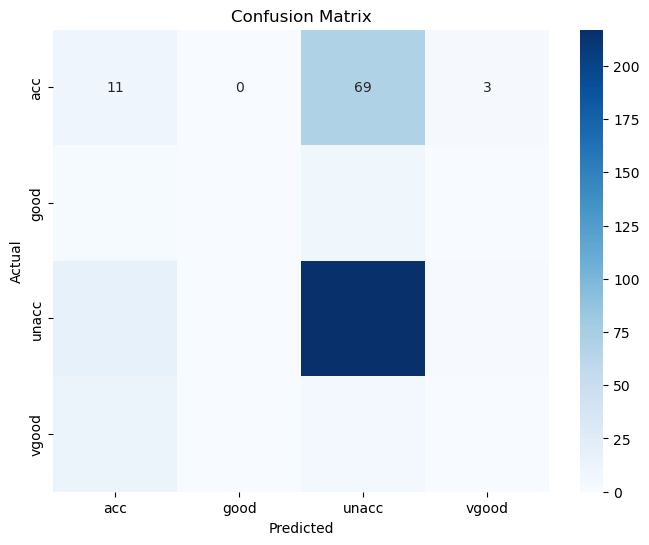

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Get feature coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute coefficient values
top_features = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display top features
print("Top Features based on Logistic Regression Coefficients:")
print(top_features.head(10))


Top Features based on Logistic Regression Coefficients:
    Feature  Coefficient
5    safety     0.591514
3   persons     0.277858
4  lug_boot     0.182785
1     maint     0.063794
0    buying    -0.037202
2     doors     0.023727
